In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/5000_final.csv')

In [ ]:
dataset.head()

,pdbid,binding_affinity (kcal/mol),binding_affinity_sd (kcal/mol),electrostatic (kcal/mol),electrostatic_sd (kcal/mol),polar_solvation (kcal/mol),polar_solvation_sd (kcal/mol),non_polar_solvation (kcal/mol),non_polar_solvation_sd (kcal/mol),vdW (kcal/mol)
0,6g3f,-0.25570,1.19548,-0.98408,1.12502,-0.34568,0.24300,1.26248,1.12080,-0.18842
1,5fpd,-2.61456,2.67150,-1.01432,1.22772,-0.56942,0.40202,1.62432,1.48674,-2.65510
2,6hxe,-0.98558,2.57244,-8.41628,3.52346,-0.81082,0.32616,7.90220,3.00116,0.33930
3,5nqb,-1.05920,1.90178,-36.85828,13.23790,-0.46456,0.24828,34.03790,11.65862,2.22572
4,4q3f,-1.52816,1.87006,-5.36862,3.20528,-0.74246,0.32006,5.44818,2.73016,-0.86530


In [ ]:
X = dataset.iloc[:,3:]

In [ ]:
y = dataset.iloc[:,1]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [ ]:
# Use polynomial features
degree = 2  # adjust degree to change the complexity of the model
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
# Create a pipeline with polynomial features and a linear regression model
pipeline = make_pipeline(poly, LinearRegression())
pipeline.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [ ]:
score = pipeline.score(X_test, y_test)

score

0.9999257957776051

In [ ]:
# autodock_results = pd.read_csv('/content/drive/MyDrive/autodock_results.csv')

# # Extract the relevant energy columns
# energy_columns = ["electrostatic (kcal/mol)", "electrostatic_sd (kcal/mol)", "polar_solvation (kcal/mol)", "polar_solvation_sd (kcal/mol)", "non_polar_solvation (kcal/mol)", "non_polar_solvation_sd (kcal/mol)", "vdW (kcal/mol)"]
# new_data = autodock_results[energy_columns]

# # Use the trained model to predict the binding affinity values for the new data
# predicted_binding_affinity = pipeline.predict(new_data)

# # Add the predicted binding affinity values to the Autodock results DataFrame
# autodock_results["predicted_binding_affinity"] = predicted_binding_affinity

In [ ]:
# # Print the updated DataFrame
# print(autodock_results)
# print(predicted_binding_affinity)

   electrostatic (kcal/mol)  electrostatic_sd (kcal/mol)  \
0                         0                            0   

   polar_solvation (kcal/mol)  polar_solvation_sd (kcal/mol)  \
0                     0.27894                        0.33314   

   non_polar_solvation (kcal/mol)  non_polar_solvation_sd (kcal/mol)  \
0                         0.99094                             0.4344   

   vdW (kcal/mol)  predicted_binding_affinity  
0        -7.49766                   -6.249658  
[-6.2496581]


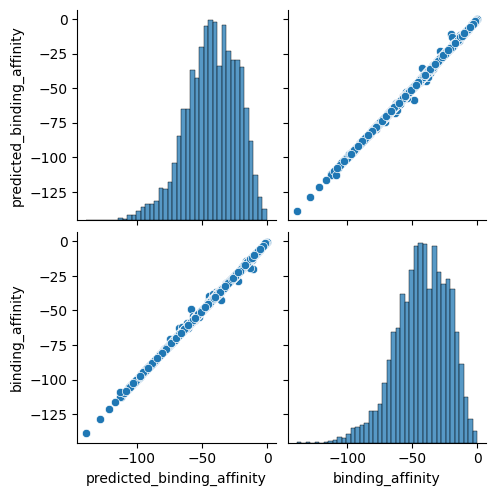

In [ ]:
# # Create a new DataFrame with the predicted and actual binding affinity values for the training data
# predicted_vs_actual_train = pd.DataFrame({'predicted_binding_affinity': pipeline.predict(X_train), 'binding_affinity': y_train})

# # Use seaborn's pairplot function to create a scatterplot matrix
# sns.pairplot(predicted_vs_actual_train)
# plt.show()

In [ ]:
# threshold = -8.0
# autodock_results['binders'] = autodock_results['predicted_binding_affinity'].apply(lambda x: x <= threshold)
# print("Number of binders:", autodock_results['binders'].sum())
# print("Number of non-binders:", len(autodock_results) - autodock_results['binders'].sum())

Number of binders: 0
Number of non-binders: 1


In [ ]:
# for index, row in autodock_results.iterrows():
#     if row['predicted_binding_affinity'] <= threshold:
#         print(f"Complex {index} is a binder")
#     else:
#         print(f"Complex {index} is a non-binder")

Complex 0 is a non-binder
